In [137]:
# Dependencies and Setup I
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [138]:
# Dependencies and Setup II
import numpy as np
import pandas as pd
import datetime as dt

# Step 1


* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.

#### Reflect Tables into SQLAlchemy ORM

In [139]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

#### Creating The Engine to connect to  "hawaii.sqlite" database

In [140]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

#### Create    automap_base()    to reflect your tables into classes 

In [141]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [155]:
# Used `engine.execute` to select and display the first 5 rows from the 'measurement' table
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [156]:
# Used `engine.execute` to select and display the first 5 rows from the 'station' table
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

#### Save a reference for both the classes called 'Station' and 'Measurement'

In [157]:
# Save reference to Measurment table
Measurement = Base.classes.measurement

# Save reference to Station table
Station = Base.classes.station

#### Session (link) from Python to the DataBase

In [158]:
# Create our session (link) from Python to the DB
session = Session(engine)

### Measurement Table

In [159]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Using the inspector to print the column names within the 'dow' table and its types.
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])  # Get column information 

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


### Station Table

In [160]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Using the inspector to print the column names within the 'dow' table and its types.
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])  # Get column information 

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Step 2 :  Exploratory Climate Analysis

### Date Query
* Query the last date in our database
* Retrieve the date one year from last date

In [161]:
# Query the last date from Measurment Table (column 'date')
lastest_date =session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(lastest_date)

('2017-08-23',)


In [162]:
# Calculate the date 1 year ago from the last data point in the database
# date one year ago from ('2017-08-23',)
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


## Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data and plot the results

* Calculate the date 1 year ago from the last data point in the database

* Perform a query and only select only the `date` and `prcp` values/scores.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Save the query results as a Pandas DataFrame and set the index to the date column

* Sort the DataFrame values by `date`.

* Plot the results using the DataFrame `plot` method.

In [163]:
# Design a query to retrieve the last 12 months of precipitation data Selecting Only the `date` and `prcp` Values
# Plot the results
lastyear_prcp_date = session.query(Measurement.date, Measurement.prcp).\
                          filter( Measurement.date >= year_ago ).\
                          order_by(Measurement.date.desc()).all()
#prcp_date 

In [164]:
# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(Measurement.prcp).\
              order_by(Measurement.date.desc()).all()
#prcp_scores

### Create DataFrame (option 1)

In [165]:
# Save the query results as a Pandas DataFrame
# Set the index to the date column 
# Sort the dataframe by date

df = pd.DataFrame(lastyear_prcp_date, columns=["Date", "Precipitation"])
df.set_index('Date', inplace=True)     # we set index to be use later in our plot as x-axis
df.sort_values('Date', inplace=True)   # inplace= True will over-write in dataframe and makes the change permanant
df.head()

,Precipitation
Date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,NaN


### Create DataFrame  (option 2)

In [176]:
# Perform a query to retrieve the data and precipitation scores
date = [d[0] for d in lastyear_prcp_date]
precipitation = [p[1] for p in lastyear_prcp_date]

# Save the query results as a Pandas DataFrame 
climate_df = pd.DataFrame({'Date' : date,
                           'Precipitation' : precipitation})

# Set the index to the date column
climate_df =climate_df.set_index('Date')
# Sort the dataframe by date
climate_df = climate_df.sort_values('Date')
climate_df.head()

,Precipitation
Date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,NaN


### Rain Perciptation Analysis Graph (via Matplotlib)

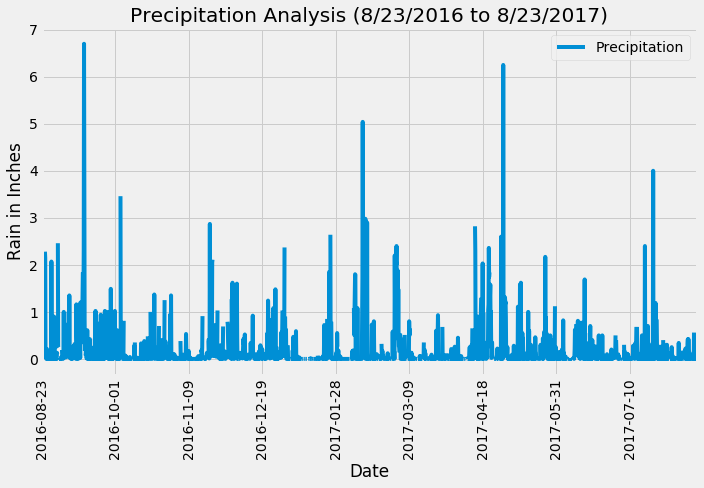

In [170]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(title="Precipitation Analysis (8/23/2016 to 8/23/2017)", figsize=(10,7))
plt.legend(loc='upper right')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("Images/precipitation.png")
plt.show()

----------
#### Use Pandas to Calcualte the Summary Statistics for the Precipitation Data

In [180]:
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order.

  * Which station has the highest number of observations?

  * Hint: You will need to use a function such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.

* Design a query to retrieve the last 12 months of temperature observation data (TOBS).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

####  Design a query to calculate the total number of stations.

In [209]:
# # Design a query to show how many stations are available in this dataset? 'measurement', 'station'
stations = session.query(Measurement).group_by(Measurement.station).count()
stations

#    **************** Other Ways to find do this Query ****************

#           stations = session.query(func.count(Station.id)).all()

#           stations = session.query(Measurement.station).distinct().count()

9

### Where are the Most Active Stations?

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order.

  * Which station has the highest number of observations?

  * Hint: You will need to use a function such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.

In [190]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.



In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
